In [1]:
#!pip install SpeechRecognition
#!pip install pyaudio
#!pip install nltk

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [3]:
def get_hand_points(hand):
    x = [[hand.iloc[0].x, hand.iloc[1].x, hand.iloc[2].x, hand.iloc[3].x, hand.iloc[4].x], # Thumb
         [hand.iloc[5].x, hand.iloc[6].x, hand.iloc[7].x, hand.iloc[8].x], # Index
         [hand.iloc[9].x, hand.iloc[10].x, hand.iloc[11].x, hand.iloc[12].x],
         [hand.iloc[13].x, hand.iloc[14].x, hand.iloc[15].x, hand.iloc[16].x],
         [hand.iloc[17].x, hand.iloc[18].x, hand.iloc[19].x, hand.iloc[20].x],
         [hand.iloc[0].x, hand.iloc[5].x, hand.iloc[9].x, hand.iloc[13].x, hand.iloc[17].x, hand.iloc[0].x]]

    y = [[hand.iloc[0].y, hand.iloc[1].y, hand.iloc[2].y, hand.iloc[3].y, hand.iloc[4].y],  #Thumb
         [hand.iloc[5].y, hand.iloc[6].y, hand.iloc[7].y, hand.iloc[8].y], # Index
         [hand.iloc[9].y, hand.iloc[10].y, hand.iloc[11].y, hand.iloc[12].y],
         [hand.iloc[13].y, hand.iloc[14].y, hand.iloc[15].y, hand.iloc[16].y],
         [hand.iloc[17].y, hand.iloc[18].y, hand.iloc[19].y, hand.iloc[20].y],
         [hand.iloc[0].y, hand.iloc[5].y, hand.iloc[9].y, hand.iloc[13].y, hand.iloc[17].y, hand.iloc[0].y]]
    return x, y

def get_pose_points(pose):
    x = [[pose.iloc[8].x, pose.iloc[6].x, pose.iloc[5].x, pose.iloc[4].x, pose.iloc[0].x, pose.iloc[1].x, pose.iloc[2].x, pose.iloc[3].x, pose.iloc[7].x],
         [pose.iloc[10].x, pose.iloc[9].x],
         [pose.iloc[22].x, pose.iloc[16].x, pose.iloc[20].x, pose.iloc[18].x, pose.iloc[16].x, pose.iloc[14].x, pose.iloc[12].x,
          pose.iloc[11].x, pose.iloc[13].x, pose.iloc[15].x, pose.iloc[17].x, pose.iloc[19].x, pose.iloc[15].x, pose.iloc[21].x],
         [pose.iloc[12].x, pose.iloc[24].x, pose.iloc[26].x, pose.iloc[28].x, pose.iloc[30].x, pose.iloc[32].x, pose.iloc[28].x],
         [pose.iloc[11].x, pose.iloc[23].x, pose.iloc[25].x, pose.iloc[27].x, pose.iloc[29].x, pose.iloc[31].x, pose.iloc[27].x],
         [pose.iloc[24].x, pose.iloc[23].x]
        ]

    y = [[pose.iloc[8].y, pose.iloc[6].y, pose.iloc[5].y, pose.iloc[4].y, pose.iloc[0].y, pose.iloc[1].y, pose.iloc[2].y, pose.iloc[3].y, pose.iloc[7].y],
         [pose.iloc[10].y, pose.iloc[9].y],
         [pose.iloc[22].y, pose.iloc[16].y, pose.iloc[20].y, pose.iloc[18].y, pose.iloc[16].y, pose.iloc[14].y, pose.iloc[12].y,
          pose.iloc[11].y, pose.iloc[13].y, pose.iloc[15].y, pose.iloc[17].y, pose.iloc[19].y, pose.iloc[15].y, pose.iloc[21].y],
         [pose.iloc[12].y, pose.iloc[24].y, pose.iloc[26].y, pose.iloc[28].y, pose.iloc[30].y, pose.iloc[32].y, pose.iloc[28].y],
         [pose.iloc[11].y, pose.iloc[23].y, pose.iloc[25].y, pose.iloc[27].y, pose.iloc[29].y, pose.iloc[31].y, pose.iloc[27].y],
         [pose.iloc[24].y, pose.iloc[23].y]
        ]
    return x, y

def animation_frame(f):
    frame = df[df.frame==f]
    left = frame[frame.type=='left_hand']
    right = frame[frame.type=='right_hand']
    pose = frame[frame.type=='pose']
    face = frame[frame.type=='face'][['x', 'y']].values
    lx, ly = get_hand_points(left)
    rx, ry = get_hand_points(right)
    px, py = get_pose_points(pose)
    ## These values set the limits on the graph to stabilize the video
    xmin = df.x.min() - 0.2
    xmax = df.x.max() + 0.2
    ymin = df.y.min() - 0.2
    ymax = df.y.max() + 0.2
    
    ax.clear()
    ax.plot(face[:,0], face[:,1], '.')
    for i in range(len(lx)):
        ax.plot(lx[i], ly[i])
    for i in range(len(rx)):
        ax.plot(rx[i], ry[i])
    for i in range(len(px)):
        ax.plot(px[i], py[i])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

In [4]:
import speech_recognition as sr

# Initialize the recognizer
recognizer = sr.Recognizer()

# Function to convert speech to text
def speech_to_text():
    with sr.Microphone() as source:
        print("Speak something...")
        audio = recognizer.listen(source)  # Listen to the microphone input

    try:
        text = recognizer.recognize_google(audio)  # Use Google Speech Recognition
        print("You said:", text)
        return text
    except sr.UnknownValueError:
        print("Could not understand audio")
        return ""
    except sr.RequestError as e:
        print("Error occurred; {0}".format(e))
        return ""
    

In [5]:
# Convert speech to text
speech_text = speech_to_text()

Speak something...
You said: hello I love you happy


In [6]:
#txt to keyword
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Download NLTK resources (only required once)
#nltk.download('punkt')
#nltk.download('stopwords')

# Function to extract keywords from text
def extract_filtered_words(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove stopwords (common words like 'the', 'is', 'are', etc.)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    
    return filtered_words

# Extract keywords from the speech-to-text output
keywords = extract_filtered_words(speech_text)
print("Keywords:", keywords)

Keywords: ['hello', 'love', 'happy']


In [7]:
folder_path = 'E:\Engineering\HACKATHON\GIT\SignsData'

In [8]:
def createSentenceDf(keywords):
    sentence_df =  pd.DataFrame()
    for sign in keywords :
        df = pd.read_csv(os.path.join(folder_path, sign, f'{sign}1.csv'))
        sentence_df = pd.concat([sentence_df, df])
    return sentence_df


In [9]:
keywords = ["hello", "iloveyou", "yes", "happy"]

In [10]:
df = createSentenceDf(keywords)
df

,frame,row_id,type,landmark_index,x,y,z
0,1,1-pose-0,pose,0,0.072805,0.728703,-1.146874
1,1,1-pose-1,pose,1,0.092315,0.768224,-1.084959
2,1,1-pose-2,pose,2,0.102345,0.766240,-1.084086
3,1,1-pose-3,pose,3,0.111464,0.763789,-1.083412
4,1,1-pose-4,pose,4,0.055151,0.774073,-1.069484
...,...,...,...,...,...,...,...
10855,20,20-right_hand-16,right_hand,16,-0.180860,0.782117,-0.051130
10856,20,20-right_hand-17,right_hand,17,-0.231386,0.622941,-0.031278
10857,20,20-right_hand-18,right_hand,18,-0.237988,0.670158,-0.043335
10858,20,20-right_hand-19,right_hand,19,-0.237417,0.703192,-0.046161


In [11]:
df.frame.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

IndexError: single positional indexer is out-of-bounds

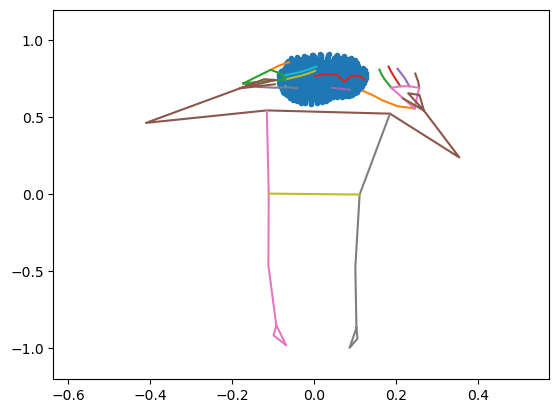

In [12]:
fig, ax = plt.subplots()
l, = ax.plot([], [])
animation = FuncAnimation(fig, func=animation_frame, frames=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
)

#print(f"The phrase being shown here is: {speech_text}")
HTML(animation.to_html5_video())